# Paquetes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Carga de datos y separación en sets de entrenamiento y prueba

In [2]:
df=np.load("proyecto_training_data.npy")
df

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [3]:
train_index=np.random.choice(len(df), int(0.8 * len(df)), replace=False)

In [4]:
train=df[train_index]

In [5]:
test=df[~np.isin(np.arange(len(df)), train_index)]

In [6]:
len(train)

1168

In [7]:
len(test)

292

# Ánalisis exploratorio

In [8]:
columnas=["SalePrice","Quality","1stFloor","Rooms","YearBuilt","LotFrontage"]

SalePrice:
Media: 178603.61
Máximo: 755000.0
Mínimo: 35311.0
Rango: 719689.0
Desviación estándar: 79294.46


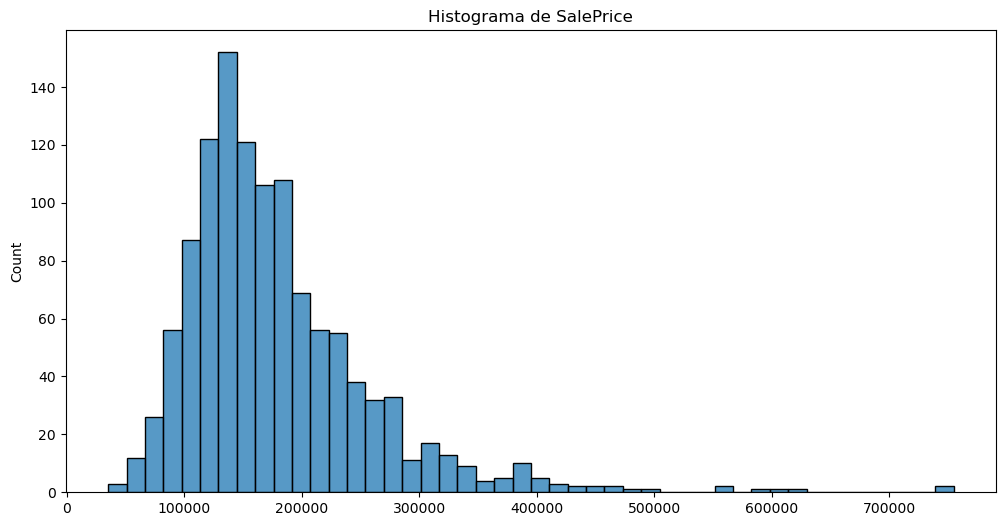


Quality:
Media: 6.06
Máximo: 10.0
Mínimo: 1.0
Rango: 9.0
Desviación estándar: 1.38


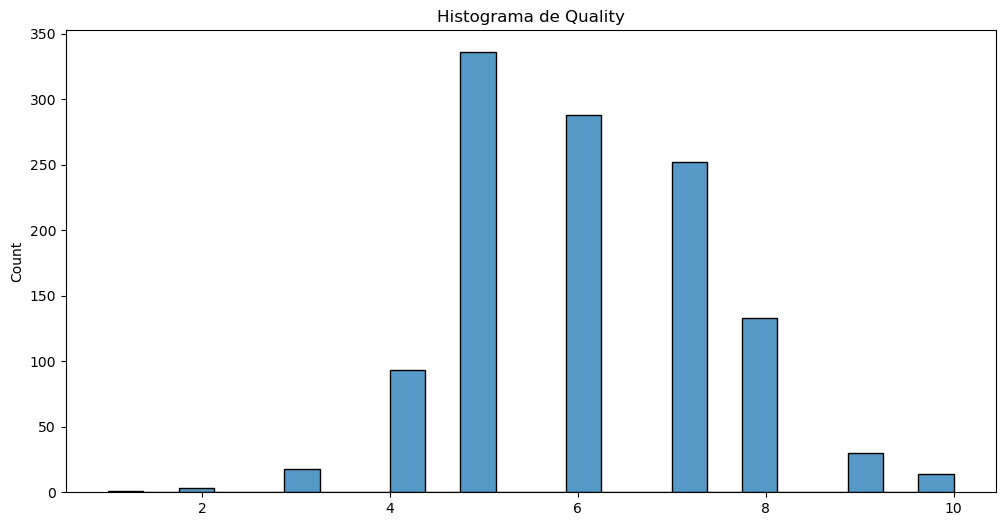


1stFloor:
Media: 1153.94
Máximo: 3228.0
Mínimo: 372.0
Rango: 2856.0
Desviación estándar: 375.97


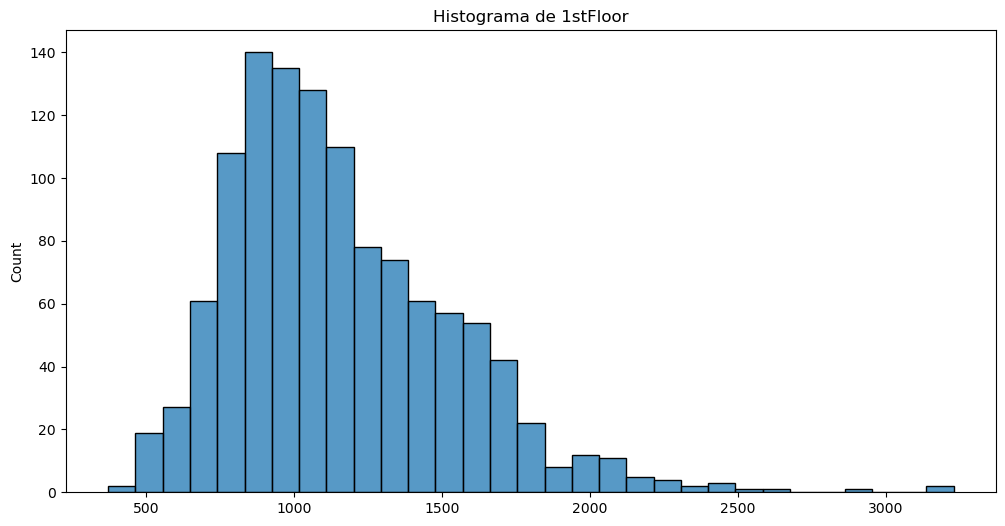


Rooms:
Media: 6.51
Máximo: 14.0
Mínimo: 3.0
Rango: 11.0
Desviación estándar: 1.62


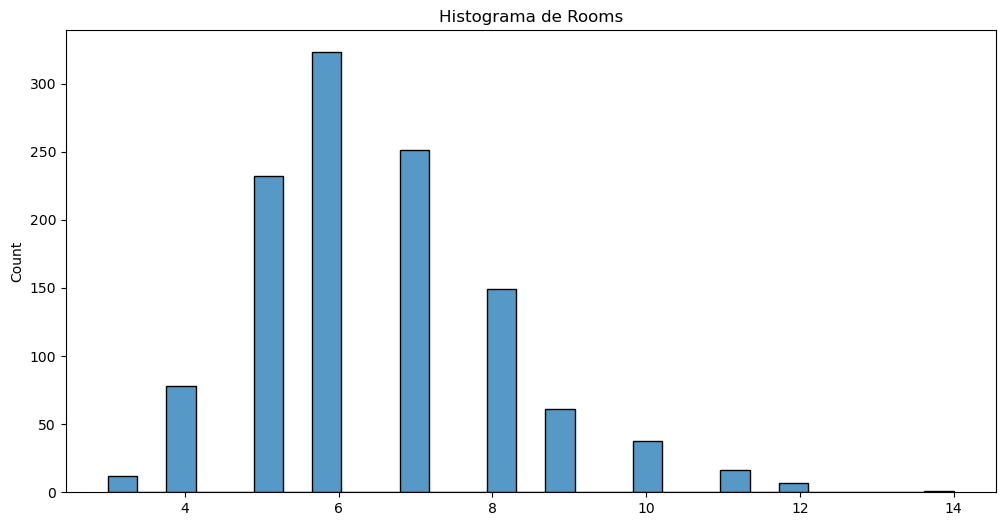


YearBuilt:
Media: 1970.5
Máximo: 2009.0
Mínimo: 1872.0
Rango: 137.0
Desviación estándar: 30.2


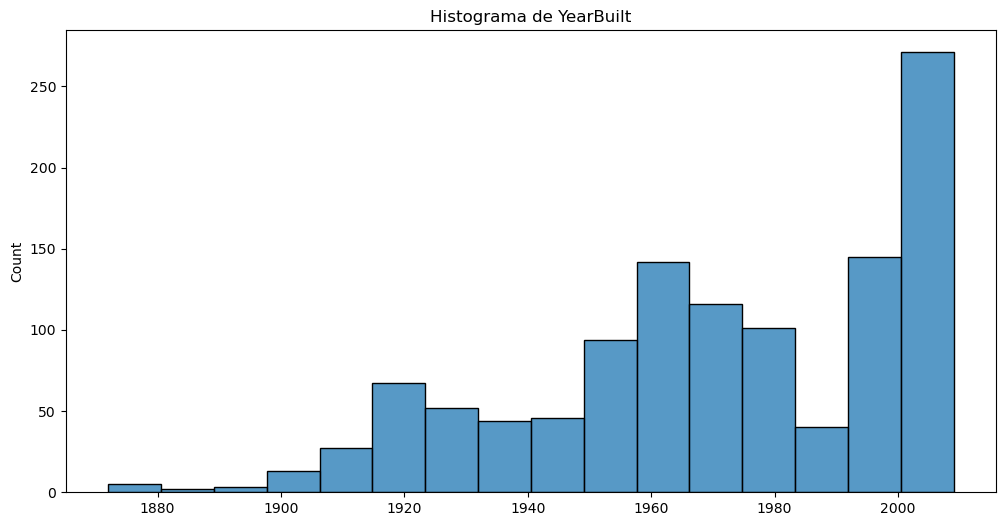


LotFrontage:
Media: 69.76
Máximo: 313.0
Mínimo: 21.0
Rango: 292.0
Desviación estándar: 23.62


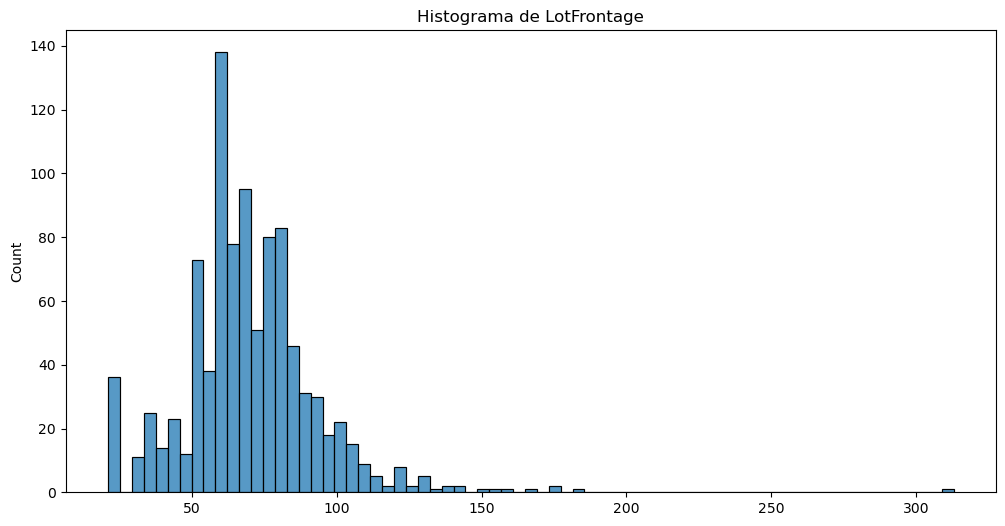

In [9]:
for i in range(0,len(columnas)):
    print(columnas[i]+":")
    print("Media:",round(np.nanmean(train[:,i]),2))
    print("Máximo:",round(np.nanmax(train[:,i]),2))
    print("Mínimo:",round(np.nanmin(train[:,i]),2))
    print("Rango:",round(np.nanmax(train[:,i]),2)-round(np.nanmin(train[:,i]),2))
    print("Desviación estándar:",round(np.nanstd(train[:,i]),2))
    plt.figure(figsize=(12,6))
    sns.histplot(train[:,i])
    plt.title("Histograma de "+columnas[i])
    plt.show()
    print("")

# Correlación entre precio y predictoras

In [10]:
train_df=pd.DataFrame(train, columns=columnas)
test_df=pd.DataFrame(test, columns=columnas)

In [11]:
train_corr=train_df.corr()
train_corr

,SalePrice,Quality,1stFloor,Rooms,YearBuilt,LotFrontage
SalePrice,1.000000,0.795323,0.620890,0.542443,0.531309,0.377242
Quality,0.795323,1.000000,0.469621,0.429493,0.583204,0.240038
1stFloor,0.620890,0.469621,1.000000,0.405400,0.283944,0.430003
Rooms,0.542443,0.429493,0.405400,1.000000,0.121643,0.363027
YearBuilt,0.531309,0.583204,0.283944,0.121643,1.000000,0.117940
LotFrontage,0.377242,0.240038,0.430003,0.363027,0.117940,1.000000


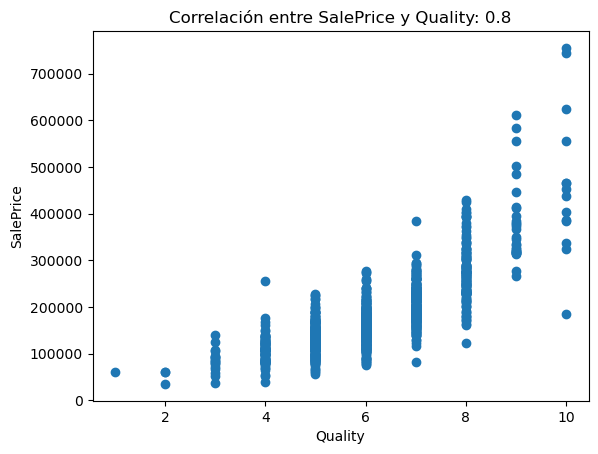

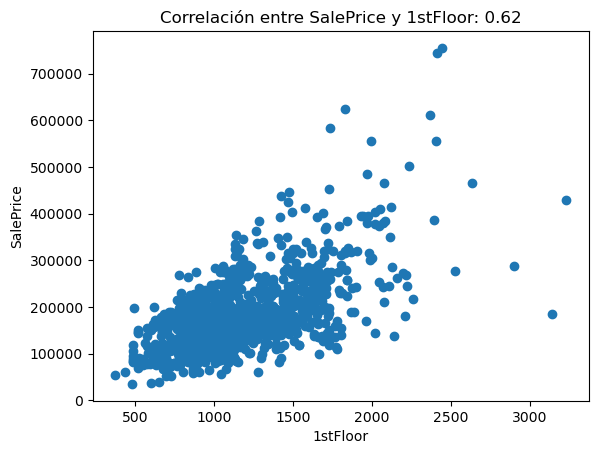

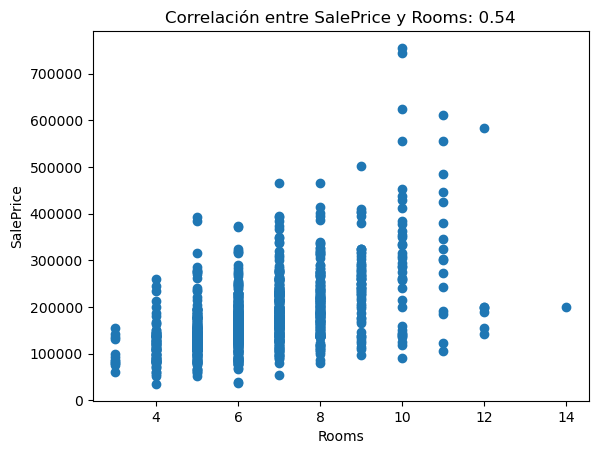

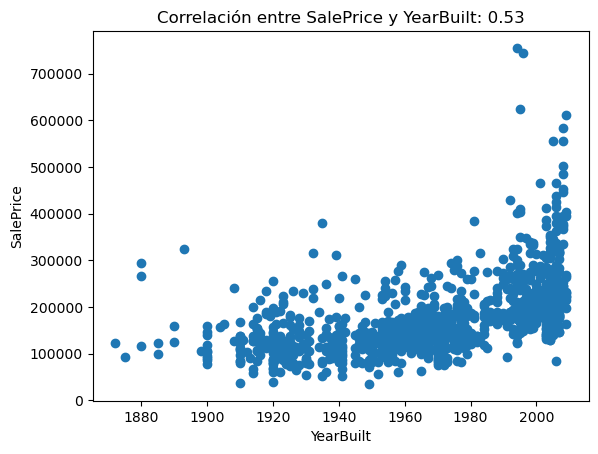

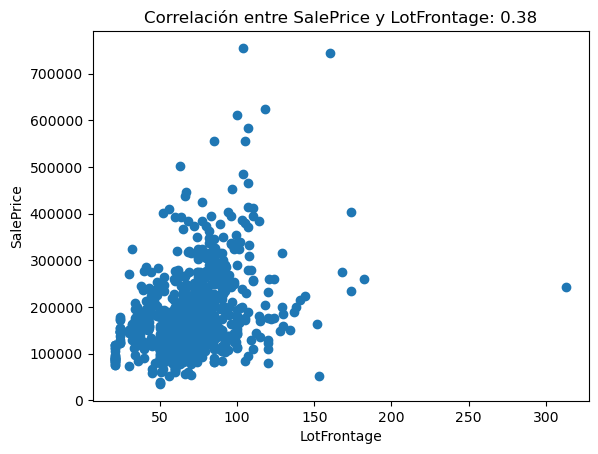

In [12]:
for i in columnas[1:]:
    plt.scatter(train_df[i], train_df["SalePrice"])
    plt.xlabel(i)
    plt.ylabel("SalePrice")
    plt.title("Correlación entre SalePrice y "+i+": "+str(round(train_corr["SalePrice"].loc[i],2)))
    plt.show()


Las dos variables con mayor poder predictivo son Quality y 1stFloor.

# Modelo de regresión lineal

In [20]:
class Regresiones:
    def __init__(self):
        self.dict_modelos={}
        self.errores=[]
        self.pred_manual=[]
        self.pred_sklearn=[]
        self.pred_promedio=[]
        self.colores = [
        '#FF3333',  
        '#FFFF33',  
        '#33FF33',  
        '#3333FF',  
        '#FF5733',  
        '#5733FF', 
        '#33FFF9',  
        '#F933FF',  
        '#FF337A',  
        '#FFA933',  
        '#33FFA9',  
        '#B433FF',  
        '#FF33A9',  
        '#33A9FF',  
        '#A933FF',  
        '#FF3398', 
        '#3398FF', 
        '#FF3398']
        
    def regresion(self, x,y,epochs,imprimir_error_cada,learning_rate):
        matriz=np.column_stack([x, np.ones(len(x))])
        #beta1 en la columna 0 y beta0 en la columna 1
        betas=np.array([0,0])
        for i in range(0, epochs):
            yhat=np.dot(matriz, betas)
            error=sum((y-yhat)**2)/(2*len(y))
            self.errores.append(error)
            gradiente=np.dot((yhat-y),matriz)/len(y)
            self.dict_modelos[i]=[betas, yhat, x, y]
            betas=betas-learning_rate*gradiente
            try:
                if i%imprimir_error_cada==0 and i!=0:
                    print ("Error de la iteración",str(i)+":",str(error))
            except ZeroDivisionError:
                pass
        return self.dict_modelos, self.errores


    def grafica_errores(self):
        plt.plot(range(len(self.errores)), self.errores)
        plt.xlabel("Iteraciones")
        plt.ylabel("Error")
        plt.title("Error del modelo")
        plt.show()


    def grafica_modelos(self, n):
        x=self.dict_modelos[0][2]
        y=self.dict_modelos[0][3]
        plt.scatter(x, y)
        for i in self.dict_modelos:
            if i%n==0 and i!=0:
                yhat=self.dict_modelos[i][1]
                plt.plot(x, yhat, color=self.colores[int(i/n)], label=('Modelo'+" "+str(i)))
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()    

        
    def regresionsk(self,x,y):
        self.modeloSK = LinearRegression().fit(x, y)
    
        
    def predicciones(self,x):
        betas=self.dict_modelos[list(self.dict_modelos)[-1]][0]
        matriz=np.column_stack([x, np.ones(len(x))])
        self.prediccion_manual=np.dot(matriz, betas)

        self.prediccion_sklearn=self.modeloSK.predict(x)

        self.prediccion_promedio=(self.prediccion_manual + self.prediccion_sklearn)/2

        return self.prediccion_manual, self.prediccion_sklearn, self.prediccion_promedio


    def errores_modelos(self, y):
        titulos=["Modelo manual", "Modelo sklearn", "Modelo promedio"]
        errores=[]
        for i in [self.prediccion_manual, self.prediccion_sklearn, self.prediccion_promedio]:
            error=np.sqrt(sum((y-i)**2)/(len(y)))
            errores.append(error)
        bp=sns.barplot(x=titulos, y=errores)
        for i, v in enumerate(errores):
            bp.text(i, v + 0.5, str(round(v,2)), ha='center')
        plt.xlabel('Modelo')
        plt.ylabel('RMSE')
        plt.title('RMSE por modelo')
        plt.show()

# Quality

## Entrenamiento con modelo manual

In [21]:
regresion_quality=Regresiones()

In [22]:
regresion_quality.regresion(train_df["Quality"], train_df["SalePrice"],15000,100,.0499)

Error de la iteración 100: 1434454572.0762682
Error de la iteración 200: 1256904593.070756
Error de la iteración 300: 1217733614.279063
Error de la iteración 400: 1193938618.9853692
Error de la iteración 500: 1179204090.7730975
Error de la iteración 600: 1170078180.0536263
Error de la iteración 700: 1164425984.9277024
Error de la iteración 800: 1160925259.1957097
Error de la iteración 900: 1158757060.755876
Error de la iteración 1000: 1157414172.2137797
Error de la iteración 1100: 1156582445.004976
Error de la iteración 1200: 1156067309.0661557
Error de la iteración 1300: 1155748256.0970414
Error de la iteración 1400: 1155550648.4571352
Error de la iteración 1500: 1155428258.8129995
Error de la iteración 1600: 1155352455.9493136
Error de la iteración 1700: 1155305506.9269226
Error de la iteración 1800: 1155276428.7285998
Error de la iteración 1900: 1155258418.9474702
Error de la iteración 2000: 1155247264.4662733
Error de la iteración 2100: 1155240355.862009
Error de la iteración 2200:

({0: [array([0, 0]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   0       7.0
   1       6.0
   2       8.0
   3       6.0
   4       5.0
          ... 
   1163    5.0
   1164    6.0
   1165    7.0
   1166    5.0
   1167    6.0
   Name: Quality, Length: 1168, dtype: float64,
   0       226000.0
   1       163990.0
   2       256300.0
   3       196000.0
   4       129000.0
             ...   
   1163    125000.0
   1164    158000.0
   1165    187100.0
   1166    106000.0
   1167    148000.0
   Name: SalePrice, Length: 1168, dtype: float64],
  1: [array([58350.96056858,  8912.32016122]),
   array([417369.04414127, 359018.08357269, 475720.00470985, ...,
          417369.04414127, 300667.12300411, 359018.08357269]),
   0       7.0
   1       6.0
   2       8.0
   3       6.0
   4       5.0
          ... 
   1163    5.0
   1164    6.0
   1165    7.0
   1166    5.0
   1167    6.0
   Name: Quality, Length: 1168, dtype: float64,
   0       226000.0
   1       163990.0
   2       256300.0
   3 

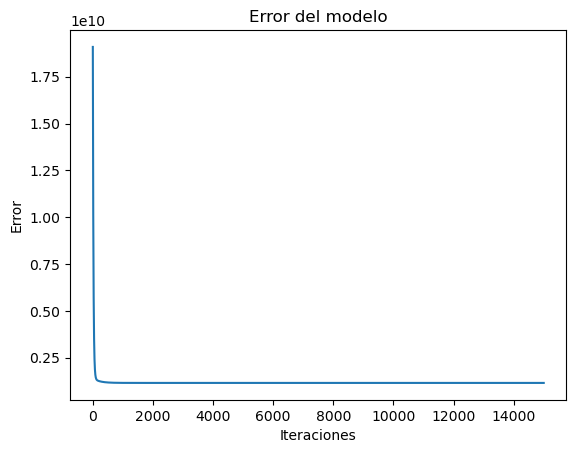

In [23]:
regresion_quality.grafica_errores()

El error no disminuye considerablemente luego de 4000 iteraciones, entonces se entrenará con 4000.

In [24]:
regresion_quality=Regresiones()
regresion_quality.regresion(train_df["Quality"], train_df["SalePrice"],4000,100,.0499)

Error de la iteración 100: 1434454572.0762682
Error de la iteración 200: 1256904593.070756
Error de la iteración 300: 1217733614.279063
Error de la iteración 400: 1193938618.9853692
Error de la iteración 500: 1179204090.7730975
Error de la iteración 600: 1170078180.0536263
Error de la iteración 700: 1164425984.9277024
Error de la iteración 800: 1160925259.1957097
Error de la iteración 900: 1158757060.755876
Error de la iteración 1000: 1157414172.2137797
Error de la iteración 1100: 1156582445.004976
Error de la iteración 1200: 1156067309.0661557
Error de la iteración 1300: 1155748256.0970414
Error de la iteración 1400: 1155550648.4571352
Error de la iteración 1500: 1155428258.8129995
Error de la iteración 1600: 1155352455.9493136
Error de la iteración 1700: 1155305506.9269226
Error de la iteración 1800: 1155276428.7285998
Error de la iteración 1900: 1155258418.9474702
Error de la iteración 2000: 1155247264.4662733
Error de la iteración 2100: 1155240355.862009
Error de la iteración 2200:

({0: [array([0, 0]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   0       7.0
   1       6.0
   2       8.0
   3       6.0
   4       5.0
          ... 
   1163    5.0
   1164    6.0
   1165    7.0
   1166    5.0
   1167    6.0
   Name: Quality, Length: 1168, dtype: float64,
   0       226000.0
   1       163990.0
   2       256300.0
   3       196000.0
   4       129000.0
             ...   
   1163    125000.0
   1164    158000.0
   1165    187100.0
   1166    106000.0
   1167    148000.0
   Name: SalePrice, Length: 1168, dtype: float64],
  1: [array([58350.96056858,  8912.32016122]),
   array([417369.04414127, 359018.08357269, 475720.00470985, ...,
          417369.04414127, 300667.12300411, 359018.08357269]),
   0       7.0
   1       6.0
   2       8.0
   3       6.0
   4       5.0
          ... 
   1163    5.0
   1164    6.0
   1165    7.0
   1166    5.0
   1167    6.0
   Name: Quality, Length: 1168, dtype: float64,
   0       226000.0
   1       163990.0
   2       256300.0
   3 

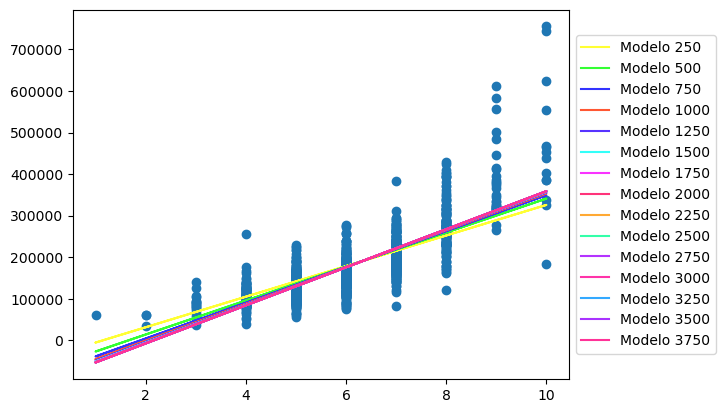

In [26]:
regresion_quality.grafica_modelos(250)

## Entrenamiento con sklearn

In [27]:
regresion_quality.regresionsk(train_df[["Quality"]], train_df["SalePrice"])

## Validación con test

In [28]:
regresion_quality.predicciones(test_df[["Quality"]])

(array([221598.04825895, 221598.04825895, 130044.53400613, 267374.80538536,
        130044.53400613, 130044.53400613, 267374.80538536, 130044.53400613,
        221598.04825895, 221598.04825895, 130044.53400613,  84267.77687972,
         84267.77687972, 130044.53400613, 175821.29113254,  84267.77687972,
        175821.29113254, 130044.53400613, 221598.04825895, 175821.29113254,
        175821.29113254, 175821.29113254, 221598.04825895,  84267.77687972,
        130044.53400613, 175821.29113254, 221598.04825895, 130044.53400613,
        175821.29113254, 175821.29113254, 221598.04825895, 221598.04825895,
        221598.04825895,  84267.77687972, 130044.53400613, 221598.04825895,
        175821.29113254, 221598.04825895, 221598.04825895, 358928.31963817,
        221598.04825895, 175821.29113254, 130044.53400613, 175821.29113254,
        175821.29113254, 221598.04825895, 175821.29113254, 267374.80538536,
        267374.80538536, 130044.53400613, 221598.04825895,  38491.01975331,
        1758

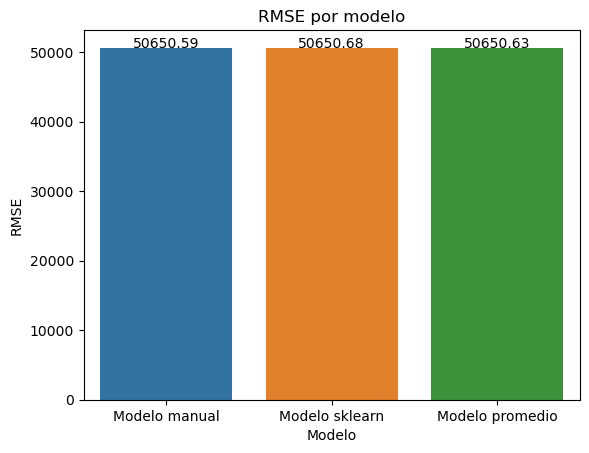

In [29]:
regresion_quality.errores_modelos(test_df["SalePrice"])

El mejor modelo es el modelo manual, aunque los tres tienen errores muy cercanos.

# 1stFloor

## Entrenamiento con modelo manual

In [49]:
regresion_1f=Regresiones()

In [50]:
regresion_1f.regresion(train_df["1stFloor"], train_df["SalePrice"],100000,10000,.00000135)

Error de la iteración 10000: 1968041101.3265643
Error de la iteración 20000: 1967947461.4285688
Error de la iteración 30000: 1967854063.851694
Error de la iteración 40000: 1967760907.9688582
Error de la iteración 50000: 1967667993.1546092
Error de la iteración 60000: 1967575318.7851028
Error de la iteración 70000: 1967482884.2381265
Error de la iteración 80000: 1967390688.8930569
Error de la iteración 90000: 1967298732.130901


({0: [array([0, 0]),
   array([0., 0., 0., ..., 0., 0., 0.]),
   0       1216.0
   1        728.0
   2       1600.0
   3       1306.0
   4        864.0
            ...  
   1163    1728.0
   1164    1302.0
   1165    1430.0
   1166    1075.0
   1167    1194.0
   Name: 1stFloor, Length: 1168, dtype: float64,
   0       226000.0
   1       163990.0
   2       256300.0
   3       196000.0
   4       129000.0
             ...   
   1163    125000.0
   1164    158000.0
   1165    187100.0
   1166    106000.0
   1167    148000.0
   Name: SalePrice, Length: 1168, dtype: float64],
  1: [array([3.03220797e+02, 2.41114874e-01]),
   array([368716.73025641, 220744.98132461, 485153.51630111, ...,
          433605.98081257, 325962.59788062, 362045.8727226 ]),
   0       1216.0
   1        728.0
   2       1600.0
   3       1306.0
   4        864.0
            ...  
   1163    1728.0
   1164    1302.0
   1165    1430.0
   1166    1075.0
   1167    1194.0
   Name: 1stFloor, Length: 1168, dtype: float6

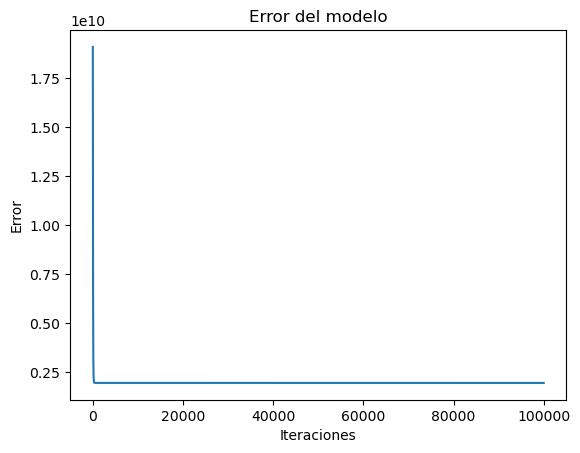

In [51]:
regresion_1f.grafica_errores()

El error sigue disminuyendo ligeramente luego de 100,000 iteraciones, pero por costo computacional es dejará en 100,000.

## Entrenamiento con sklearn

In [52]:
regresion_1f.regresionsk(train_df[["1stFloor"]], train_df["SalePrice"])

## Validación con test

In [53]:
regresion_1f.predicciones(test_df[["1stFloor"]])

(array([155915.88965147, 130344.08153855, 169919.49885617, 259725.25353846,
        187271.79721851, 134910.47584443, 252419.02264905, 207363.93216438,
        137650.31242795, 135062.68898795, 165657.53083735, 145260.96960442,
        158655.726235  , 188337.28922321, 138106.95185854, 146478.67475265,
        281035.09363256, 171593.84343499, 258964.18782081, 164744.25197617,
        100814.73169386, 155915.88965147, 256376.56438081, 131866.21297384,
        138868.01757619, 148000.80618795, 164744.25197617, 136737.03356678,
        167331.87541617, 183009.82919969, 151197.28220206, 212234.75275731,
        234914.51114318, 134606.04955737, 123342.2769362 , 162308.8416797 ,
        328830.02070076, 137498.09928442, 207668.35845143, 231413.60884201,
        263073.9426961 , 129430.80267737, 258507.54839022, 166570.80969852,
        184836.38692204, 142216.70673383, 131257.36039972, 258203.12210316,
        238719.83973141, 132170.6392609 , 186358.51835733, 199144.42241379,
        1218

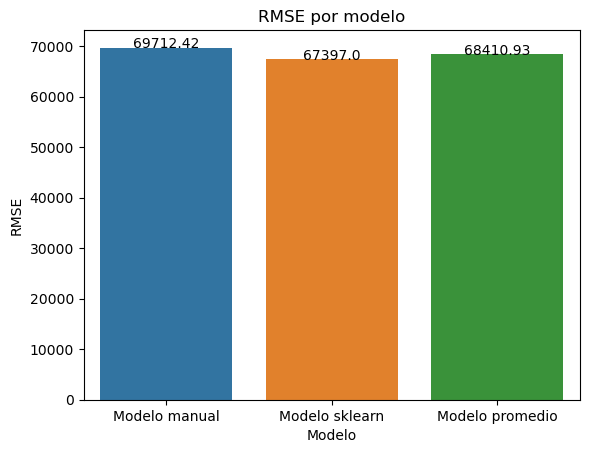

In [54]:
regresion_1f.errores_modelos(test_df["SalePrice"])

El mejor modelo es el modelo de sklearn. Se podría haber reducido el error del modelo manual con más iteraciones, pero el costo computacional se considera mayor que lo que se reducía el error.